   word_count  has_keywords  read_time  category
0         142             0          3      tech
1        1043             0          6  business
2         442             1         12    sports
3        1449             1         13      tech
4        1937             1         10      tech
Accuracy: 0.45
Precision: 0.43
Recall: 0.45


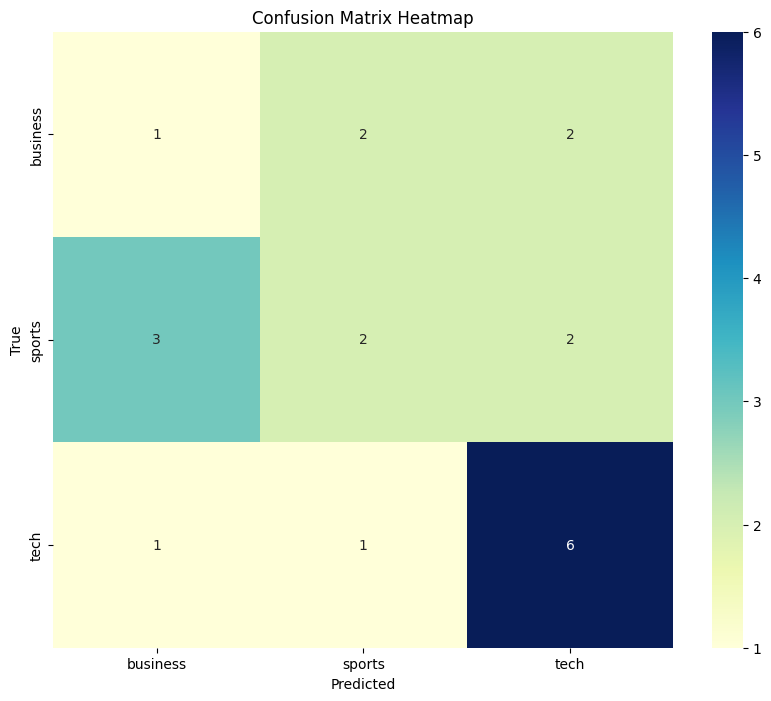

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('news_articles.csv')  # Update with your actual file name

# Check data structure
print(df.head())

# Define features and target
X = df[['word_count', 'has_keywords', 'read_time']]  # input features
y = df['category']  # target labels

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model (Naive Bayes for numeric features)
model = GaussianNB()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)

print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")

# Confusion Matrix
labels = sorted(df['category'].unique())
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()
